Epoch 1/100
658/658 [==============================] - 6s 7ms/step - loss: 0.0280 - val_loss: 0.0137
Epoch 2/100
658/658 [==============================] - 5s 8ms/step - loss: 0.0069 - val_loss: 0.0027
Epoch 3/100
658/658 [==============================] - 5s 7ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 4/100
658/658 [==============================] - 5s 7ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 5/100
658/658 [==============================] - 6s 9ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 6/100
658/658 [==============================] - 5s 7ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 7/100
658/658 [==============================] - 5s 7ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/100
658/658 [==============================] - 5s 7ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/100
658/658 [==============================] - 4s 7ms/step - loss: 9.2275e-04 - val_loss: 0.0012
Epoch 10/100
658/658 [==============================] - 5s 8ms/step - loss: 9.1929e-04 

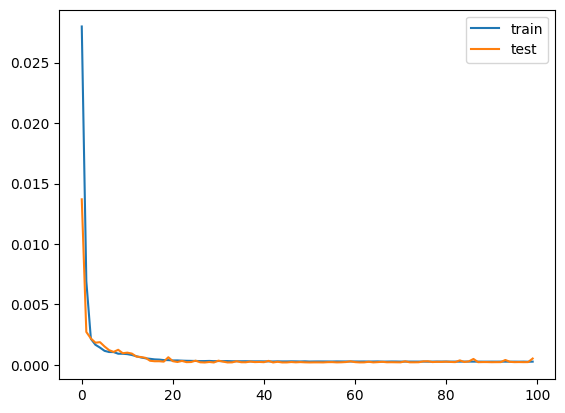

165/165 [==============================] - 1s 3ms/step


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt  # Add this line for importing matplotlib

# Generating synthetic weather data
np.random.seed(0)  # For reproducibility

# Create date range
date_range = pd.date_range(start='2000-01-01', end='2023-12-31', freq='D')

# Generate weather data
weather_data = pd.DataFrame({
    'Date': date_range,
    'Temperature': np.random.normal(loc=25, scale=5, size=len(date_range)),  # Random normal temperature
    'Rainfall': np.random.normal(loc=5, scale=3, size=len(date_range)),      # Random normal rainfall
    'Humidity': np.random.normal(loc=60, scale=10, size=len(date_range))     # Random normal humidity
})

# Generating synthetic crop yield data
regions = ['Region A', 'Region B', 'Region C']
years = range(2000, 2024)

crop_yield_data = []

for region in regions:
    for year in years:
        yield_value = np.random.normal(loc=1000, scale=200)  # Random normal crop yield
        crop_yield_data.append({'Year': year, 'Region': region, 'Yield': yield_value})

crop_yield_data = pd.DataFrame(crop_yield_data)

# Merge weather data and crop yield data based on the year
merged_data = pd.merge(weather_data, crop_yield_data, left_on=weather_data['Date'].dt.year, right_on='Year')

# Drop unnecessary columns
merged_data.drop(['Date', 'Year'], axis=1, inplace=True)

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_data.drop(['Region'], axis=1))

# Prepare sequences
sequence_length = 10
X = []
y = []

for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length])
    y.append(scaled_data[i+sequence_length, -1])

X = np.array(X)
y = np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Make predictions
predicted_y = model.predict(X_test)
#run epoch only 10